<a href="https://colab.research.google.com/github/Int-Group-44/flowers-102/blob/main/OxfordFlowers102CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
dataset_info
test_set, training_set, validation_set = dataset['test'], dataset['train'], dataset['validation']

In [3]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

print(gpus)

Physical devices cannot be modified after being initialized
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Importing TensorFlow 

In [4]:
num_classes = dataset_info.features['label'].num_classes
num_training_examples = 1020
num_validation_examples = 1020

In [5]:
IMAGE_RES = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
    #label = tf.one_hot(label, depth=num_classes)
    return image, label
BATCH_SIZE = 16
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.shuffle(num_validation_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = test_set.map(format_image).batch(BATCH_SIZE).prefetch(1)


In [6]:
def make_model(input_shape, num_classes):
  model = tf.keras.Sequential()
  model.add(layers.RandomFlip("horizontal", input_shape=input_shape))
  model.add(layers.RandomRotation(20))
  model.add(layers.RandomZoom(0.1))
  model.add(layers.RandomContrast(0.25))
  model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(512, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(1024, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(1024, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.35))
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.35))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.35))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.35))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(num_classes))
  return model


In [7]:
tf.keras.backend.clear_session()
model = make_model(input_shape=(IMAGE_RES, IMAGE_RES) + (3,), num_classes=102)

In [9]:

#keras.utils.plot_model(model, show_shapes=True)

epochs = 75

#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=validation_batches,
    batch_size=BATCH_SIZE,
    validation_batch_size=BATCH_SIZE,
    verbose=1
    #callbacks=[reduce_lr]
)

Epoch 1/75
64/64 [==============================] - 40s 423ms/step - loss: 5.2379 - accuracy: 0.0127 - val_loss: 4.6797 - val_accuracy: 0.0098
Epoch 2/75
64/64 [==============================] - 21s 322ms/step - loss: 5.0659 - accuracy: 0.0176 - val_loss: 4.8244 - val_accuracy: 0.0098
Epoch 3/75
64/64 [==============================] - 21s 324ms/step - loss: 4.9254 - accuracy: 0.0245 - val_loss: 5.0934 - val_accuracy: 0.0098
Epoch 4/75
64/64 [==============================] - 21s 323ms/step - loss: 4.8653 - accuracy: 0.0157 - val_loss: 5.2560 - val_accuracy: 0.0098
Epoch 5/75
64/64 [==============================] - 21s 322ms/step - loss: 4.7803 - accuracy: 0.0412 - val_loss: 5.1308 - val_accuracy: 0.0098
Epoch 6/75
64/64 [==============================] - 21s 320ms/step - loss: 4.6838 - accuracy: 0.0343 - val_loss: 5.0882 - val_accuracy: 0.0157
Epoch 7/75
64/64 [==============================] - 21s 321ms/step - loss: 4.6172 - accuracy: 0.0422 - val_loss: 4.8801 - val_accuracy: 0.0206

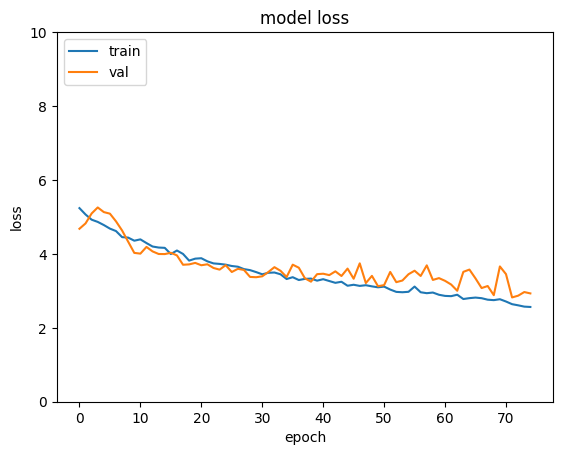

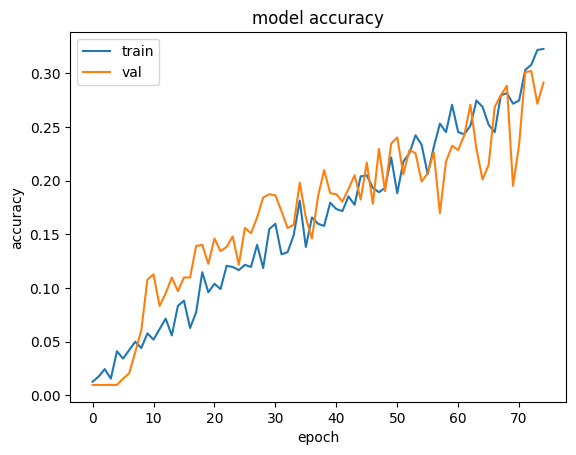

In [10]:
tloss1 = history.history['loss']
vloss1 = history.history['val_loss']
tacc1 = history.history['accuracy']
vacc1 = history.history['val_accuracy']

plt.plot(tloss1)
plt.ylim(0,10)
plt.plot(vloss1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc="upper left")
plt.show()

plt.plot(tacc1)
plt.plot(vacc1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc="upper left")
plt.show()

In [13]:

#keras.utils.plot_model(model, show_shapes=True)

epochs = 75

#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=validation_batches,
    batch_size=BATCH_SIZE,
    validation_batch_size=BATCH_SIZE,
    verbose=1
    #callbacks=[reduce_lr]
)

Epoch 1/75
64/64 [==============================] - 34s 329ms/step - loss: 2.4912 - accuracy: 0.3569 - val_loss: 2.8777 - val_accuracy: 0.2902
Epoch 2/75
64/64 [==============================] - 21s 322ms/step - loss: 2.4671 - accuracy: 0.3255 - val_loss: 2.9474 - val_accuracy: 0.2990
Epoch 3/75
64/64 [==============================] - 21s 319ms/step - loss: 2.4395 - accuracy: 0.3402 - val_loss: 2.8394 - val_accuracy: 0.3029
Epoch 4/75
64/64 [==============================] - 21s 329ms/step - loss: 2.4786 - accuracy: 0.3304 - val_loss: 2.5829 - val_accuracy: 0.3500
Epoch 5/75
64/64 [==============================] - 22s 334ms/step - loss: 2.4913 - accuracy: 0.3333 - val_loss: 3.0331 - val_accuracy: 0.2775
Epoch 6/75
64/64 [==============================] - 21s 321ms/step - loss: 2.4457 - accuracy: 0.3461 - val_loss: 2.9072 - val_accuracy: 0.2804
Epoch 7/75
64/64 [==============================] - 21s 329ms/step - loss: 2.4183 - accuracy: 0.3363 - val_loss: 3.0799 - val_accuracy: 0.2716

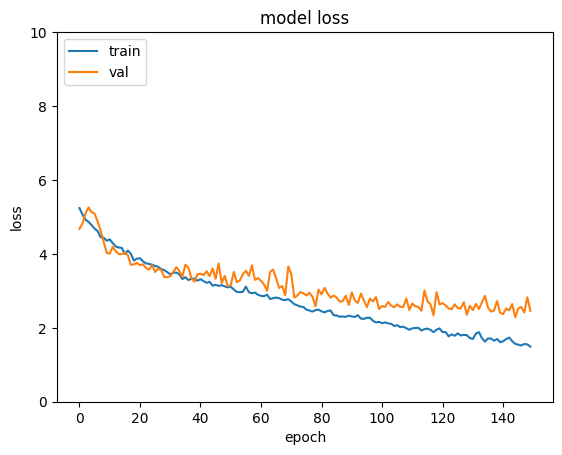

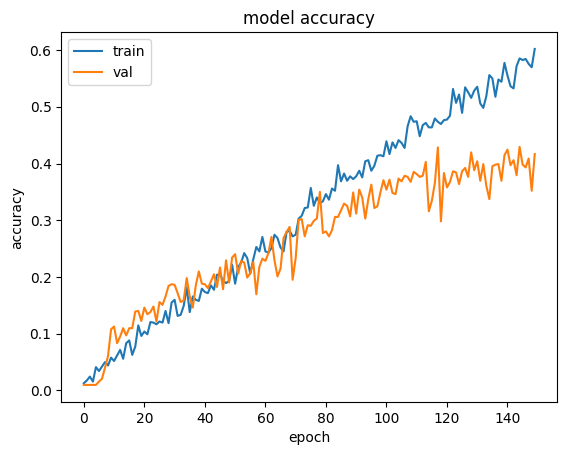

In [14]:
tloss2 = history.history['loss']
vloss2 = history.history['val_loss']
tacc2 = history.history['accuracy']
vacc2 = history.history['val_accuracy']

plt.plot(tloss1+tloss2)
plt.ylim(0,10)
plt.plot(vloss1+vloss2)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc="upper left")
plt.show()

plt.plot(tacc1+tacc2)
plt.plot(vacc1+vacc2)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc="upper left")
plt.show()

In [15]:
#keras.utils.plot_model(model, show_shapes=True)

epochs = 50

#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=validation_batches,
    batch_size=BATCH_SIZE,
    validation_batch_size=BATCH_SIZE,
    verbose=1
    #callbacks=[reduce_lr]
)

Epoch 1/50
64/64 [==============================] - 34s 329ms/step - loss: 1.4122 - accuracy: 0.6127 - val_loss: 2.3486 - val_accuracy: 0.4333
Epoch 2/50
64/64 [==============================] - 21s 320ms/step - loss: 1.4261 - accuracy: 0.6245 - val_loss: 2.2877 - val_accuracy: 0.4451
Epoch 3/50
64/64 [==============================] - 22s 336ms/step - loss: 1.3847 - accuracy: 0.6265 - val_loss: 2.2650 - val_accuracy: 0.4539
Epoch 4/50
64/64 [==============================] - 21s 322ms/step - loss: 1.4415 - accuracy: 0.6010 - val_loss: 2.2464 - val_accuracy: 0.4569
Epoch 5/50
64/64 [==============================] - 21s 327ms/step - loss: 1.4160 - accuracy: 0.6245 - val_loss: 2.2287 - val_accuracy: 0.4598
Epoch 6/50
64/64 [==============================] - 22s 328ms/step - loss: 1.3362 - accuracy: 0.6343 - val_loss: 2.2264 - val_accuracy: 0.4608
Epoch 7/50
64/64 [==============================] - 21s 326ms/step - loss: 1.3641 - accuracy: 0.6304 - val_loss: 2.2563 - val_accuracy: 0.4588

In [16]:
tloss3 = history.history['loss']
vloss3 = history.history['val_loss']
tacc3 = history.history['accuracy']
vacc3 = history.history['val_accuracy']

In [ ]:
model.save('OxfordFlowers102-2.keras')

In [ ]:
test_loss, test_acc = model.evaluate(test_batches, verbose=1, batch_size=BATCH_SIZE)
print("Test accuracy:", test_acc)


In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# make predictions on test data
y_pred = model.predict(test_batches)
y_true = np.concatenate([y for x, y in test_batches], axis=0)

385/385 [==============================] - 26s 66ms/step


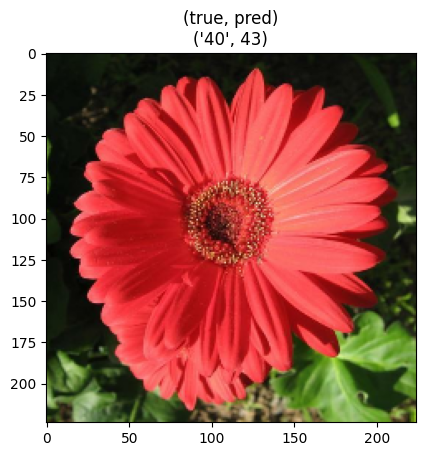

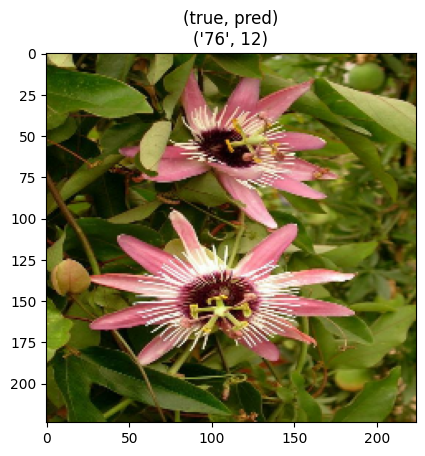

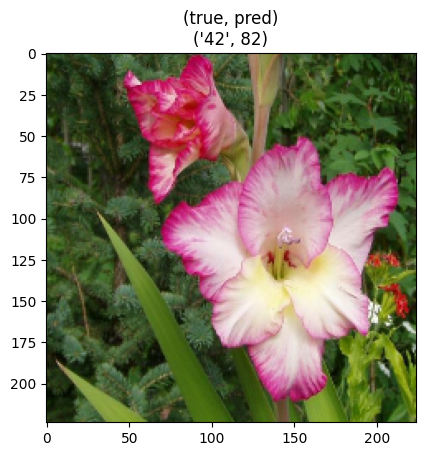

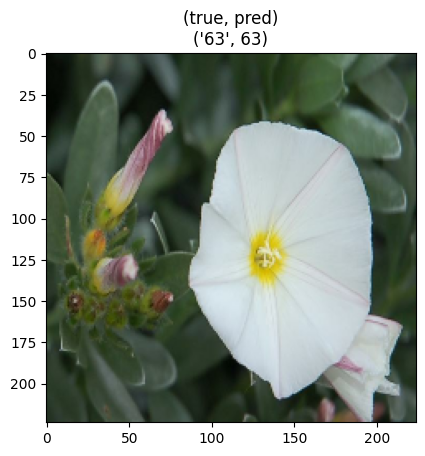

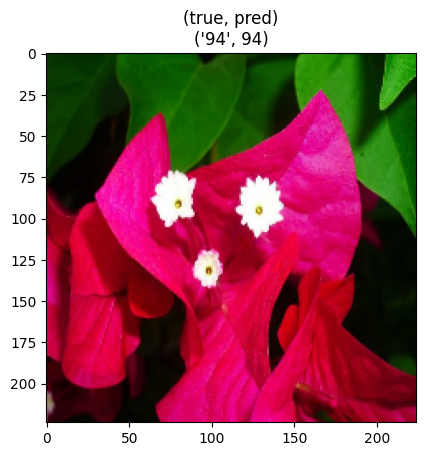

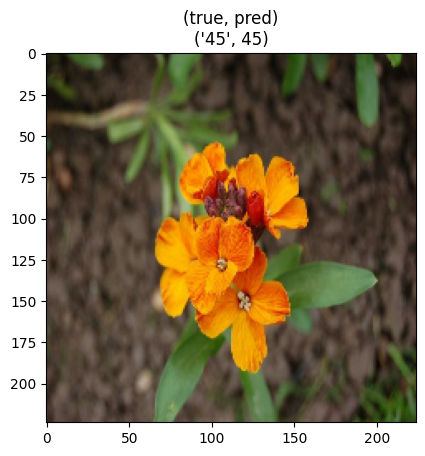

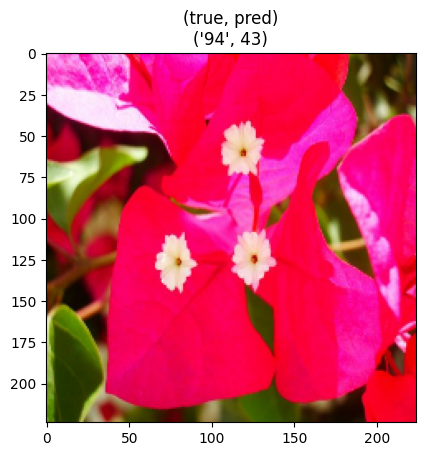

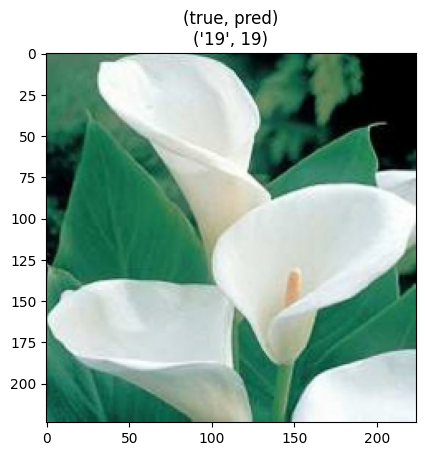

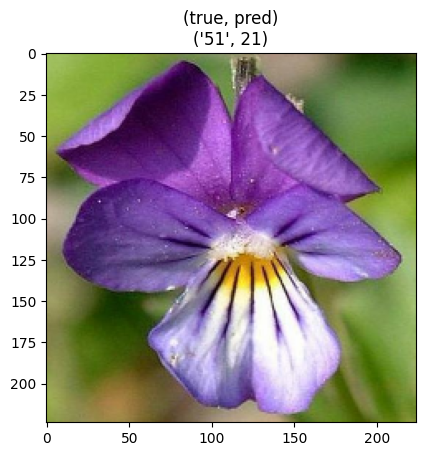

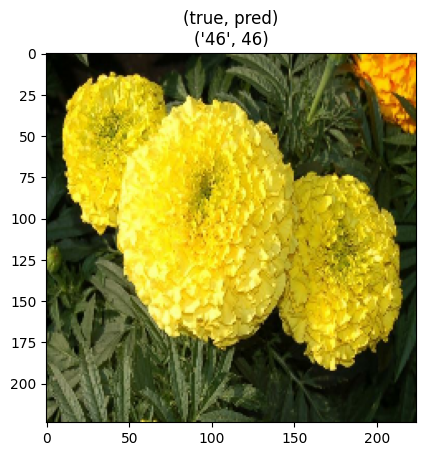

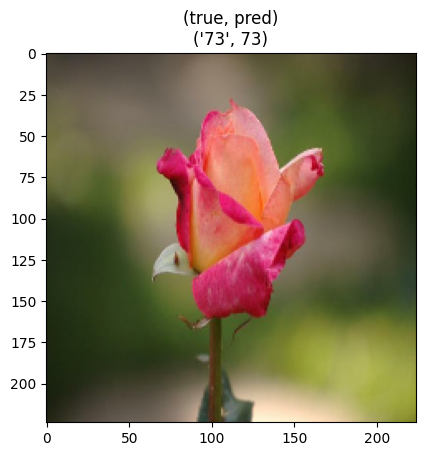

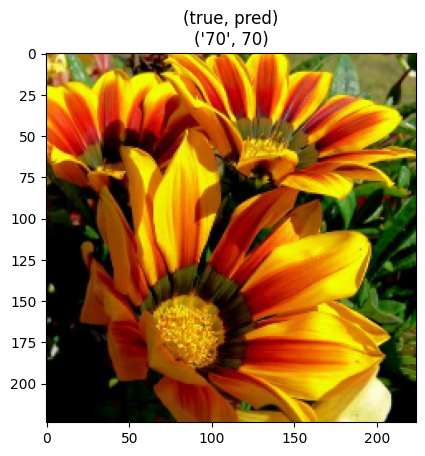

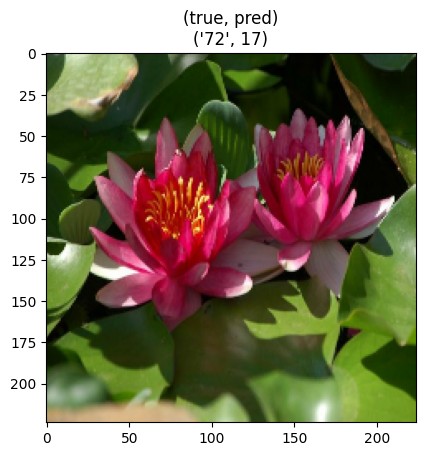

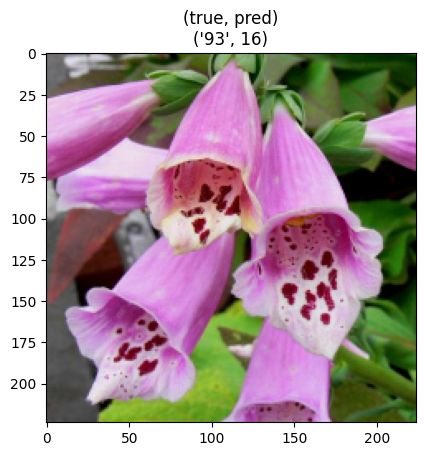

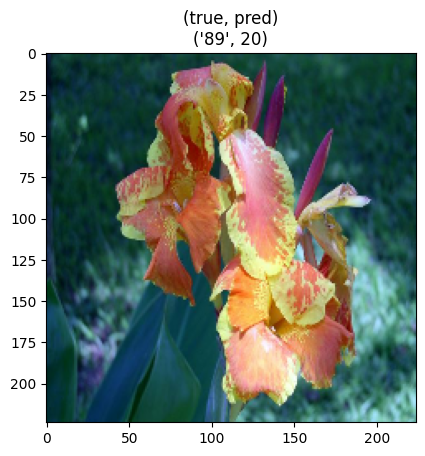

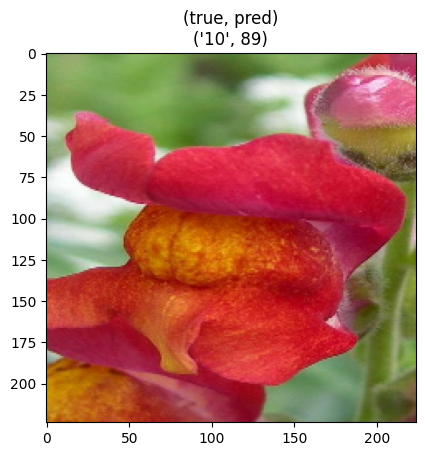

In [93]:
for features in test_batches.take(1):
  for i in range(0, 16):
    a = (features[1][i].numpy().astype(str))
    plt.title("(true, pred)\n"+str((a, np.argmax(y_pred[i]))))
    plt.imshow(features[0][i])
    plt.show()

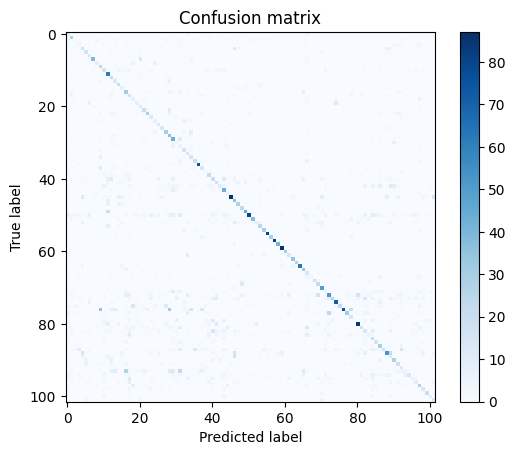

In [19]:
# plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(102)
#plt.xticks(tick_marks, dataset_info, rotation=45)
#plt.yticks(tick_marks, dataset_info)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
plt.plot(tloss1+tloss2+tloss3)
plt.ylim(0,10)
plt.plot(vloss1+vloss2+vloss3)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc="upper left")
plt.show()

In [ ]:
plt.plot(tacc1+tacc2+tacc3)
plt.plot(vacc1+vacc2+vacc3)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc="upper left")
plt.show()